# Model Comparision - Custom CNN vs Transfer Learning

### Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, f1_score
from sklearn.preprocessing import label_binarize
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import seaborn as sns

### Declare Constants

In [2]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50
input_shape = (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 11

## Load Test Dataset

In [4]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/test",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    color_mode="rgb"
)

Found 3187 files belonging to 11 classes.


In [8]:
class_names = test_dataset.class_names
n_classes = len(class_names)

## Evaluate Models

In [10]:
def evaluate_model(model, test_dataset, class_names, title_prefix="Model"):
    y_true = []
    y_pred = []
    y_pred_probs = []

    for images, labels in test_dataset:
        probs = model.predict(images, verbose=0)
        preds = np.argmax(probs, axis=1)

        y_true.extend(labels.numpy())
        y_pred.extend(preds)
        y_pred_probs.extend(probs)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_pred_probs = np.array(y_pred_probs)
    y_true_binarized = label_binarize(y_true, classes=range(len(class_names)))

    # Classification Report
    print(f"\n{title_prefix} Classification Report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{title_prefix} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(len(class_names)):
        plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'{title_prefix} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    for i in range(len(class_names)):
        precision, recall, _ = precision_recall_curve(y_true_binarized[:, i], y_pred_probs[:, i])
        ap = average_precision_score(y_true_binarized[:, i], y_pred_probs[:, i])
        plt.plot(recall, precision, label=f"{class_names[i]} (AP = {ap:.2f})")
    plt.title(f'{title_prefix} - Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True)
    plt.show()

    return {
        "y_true": y_true,
        "y_pred": y_pred,
        "y_pred_probs": y_pred_probs,
    }

## Load Models

In [11]:
custom_model = tf.keras.models.load_model("../models/Custom_CNN_Fish_Classificatio.keras")
transfer_model = tf.keras.models.load_model("../models/ResNet50_(Transfer_Learning)_fine_tuned_model.keras")

## Model Evaluation


Custom CNN Classification Report:

                                  precision    recall  f1-score   support

                     animal fish       0.97      0.99      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       1.00      0.98      0.99       298
   fish sea_food gilt_head_bream       0.94      0.93      0.93       305
   fish sea_food hourse_mackerel       0.99      0.97      0.98       286
        fish sea_food red_mullet       0.99      1.00      1.00       291
     fish sea_food red_sea_bream       0.93      0.95      0.94       273
          fish sea_food sea_bass       0.92      0.98      0.95       327
            fish sea_food shrimp       0.99      1.00      1.00       289
fish sea_food striped_red_mullet       1.00      0.95      0.97       293
             fish sea_food trout       0.97      0.98      0.98       292

                        accuracy                           0.97      3187


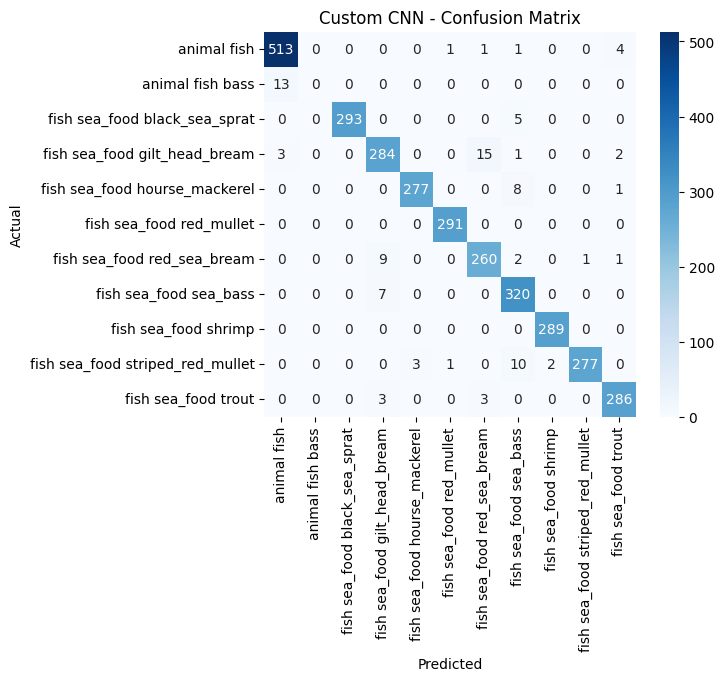

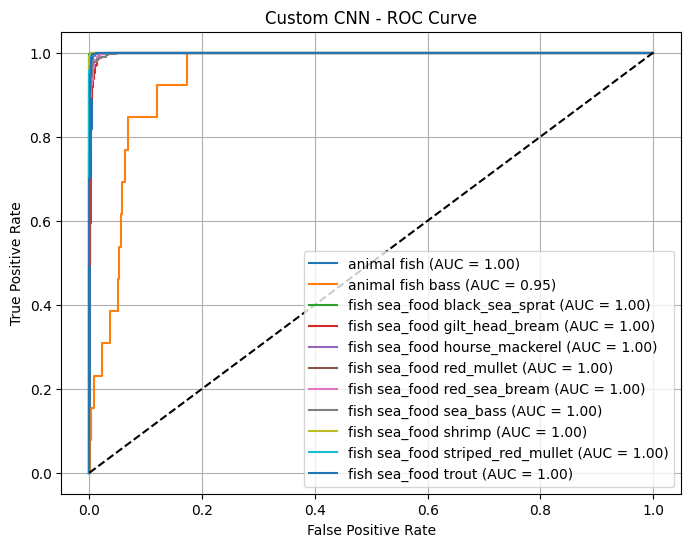

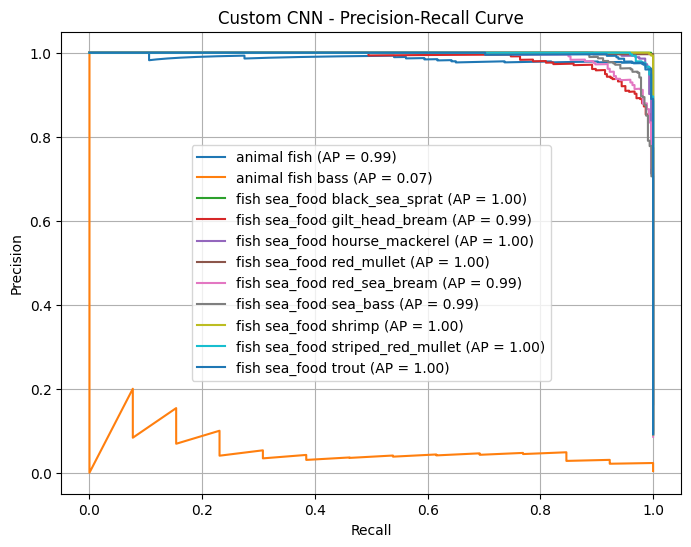


Transfer Learning (Fine-Tuned) Classification Report:

                                  precision    recall  f1-score   support

                     animal fish       1.00      1.00      1.00       520
                animal fish bass       1.00      0.92      0.96        13
   fish sea_food black_sea_sprat       1.00      1.00      1.00       298
   fish sea_food gilt_head_bream       1.00      1.00      1.00       305
   fish sea_food hourse_mackerel       1.00      1.00      1.00       286
        fish sea_food red_mullet       1.00      1.00      1.00       291
     fish sea_food red_sea_bream       1.00      1.00      1.00       273
          fish sea_food sea_bass       1.00      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       1.00      1.00      1.00       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy                      

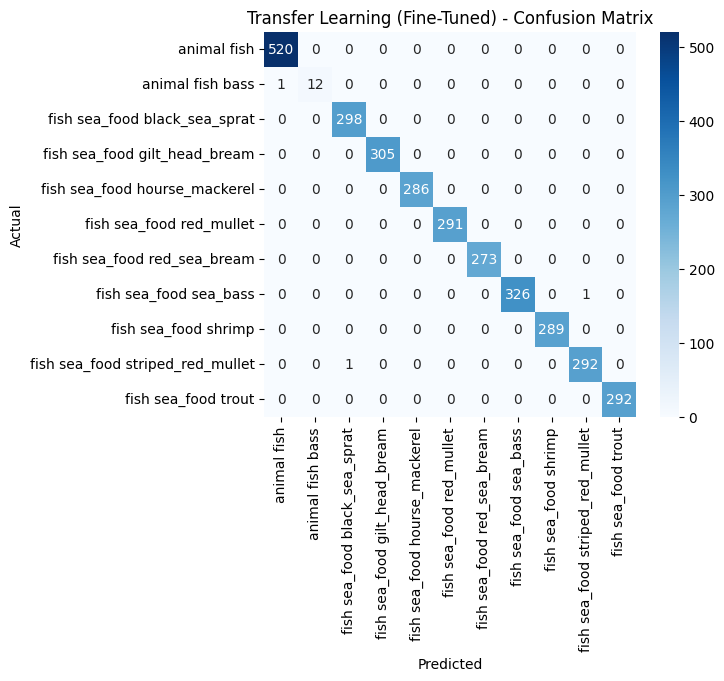

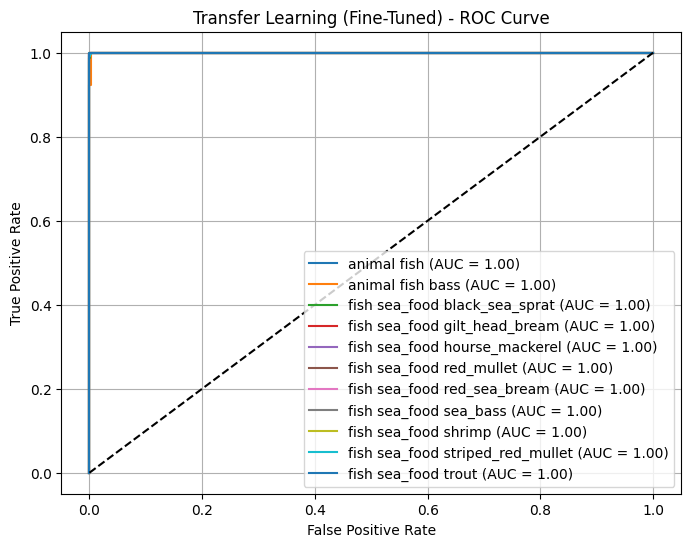

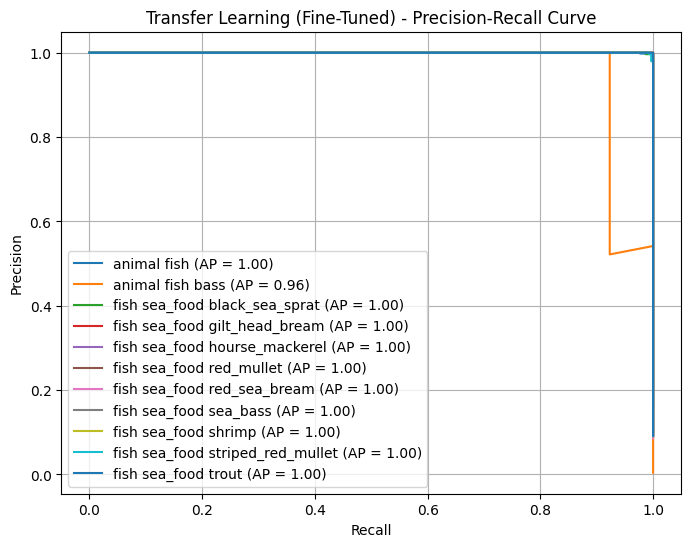

In [12]:
# Evaluate Custom CNN
custom_results = evaluate_model(custom_model, test_dataset, class_names, title_prefix="Custom CNN")

# Evaluate Transfer Learning Model
transfer_results = evaluate_model(transfer_model, test_dataset, class_names, title_prefix="Transfer Learning (Fine-Tuned)")

## Accuracy of models

In [13]:
custom_acc = np.mean(custom_results["y_true"] == custom_results["y_pred"])
transfer_acc = np.mean(transfer_results["y_true"] == transfer_results["y_pred"])

print(f"Custom CNN Accuracy: {custom_acc:.4f}")
print(f"Transfer Learning Accuracy: {transfer_acc:.4f}")

Custom CNN Accuracy: 0.9696
Transfer Learning Accuracy: 0.9991


## 1. Transfer Learning (Fine-Tuned) Model
- Accuracy: 100%

- Precision / Recall / F1-score: All are 1.00 for almost every class (except minor recall drop for “animal fish bass” with recall = 0.92).

- Confusion Matrix: Nearly perfect classification — very few misclassifications.

## 2. Custom CNN Model
- Accuracy: 97%

- Precision / Recall / F1-score: Slightly lower scores; one class (“animal fish bass”) has 0% precision/recall (model failed to classify it correctly).

- Confusion Matrix: Shows multiple misclassifications across several classes.

## Recommendation
### Choose the Transfer Learning (Fine-Tuned) Model because:

- It achieves higher overall accuracy (100% vs 97%).

- It maintains high performance across all classes, including minority classes.

- It shows minimal confusion between categories, which is crucial for multiclass classification.

## Transfer learning leverages pre-trained weights, which likely helped in achieving better generalization, especially for smaller datasets or rare classes.